In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

C:\Users\vijay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'/device:GPU:0'

In [3]:
backend.tensorflow_backend._get_available_gpus()

NameError: name 'backend' is not defined

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())#shows all available devices

NameError: name 'device_lib' is not defined

##  Data preparation 

In [3]:
from glob import glob
from sklearn.model_selection import train_test_split

# cats_train, cats_test = train_test_split(cats, test_size=0.30)
# dogs_train, dogs_test = train_test_split(dogs, test_size=0.30)

cats_train=glob("train_cars/occupied/*.jpg")
dogs_train=glob("train_cars/empty/*.jpg")


cats_test=glob("test_cars/occupied/*.jpg")
dogs_test=glob("test_cars/empty/*.jpg")


In [2]:
from PIL import Image
for i,src in enumerate(cats_train):
    image = Image.open(src)
    image.thumbnail((299,299))
    print(image.size)
    print(src)
    image.save(src)
for i,src in enumerate(dogs_train):
    image = Image.open(src)
    image.thumbnail((299,299))
    print(image.size)
    print(src)
    image.save(src)

(169, 299)
train_cars/occupied\o (1).jpg
(190, 299)
train_cars/occupied\o (11).jpg
(163, 299)
train_cars/occupied\o (12).jpg
(194, 299)
train_cars/occupied\o (13).jpg
(196, 299)
train_cars/occupied\o (14).jpg
(204, 299)
train_cars/occupied\o (15).jpg
(169, 299)
train_cars/occupied\o (16).jpg
(169, 299)
train_cars/occupied\o (17).jpg
(169, 299)
train_cars/occupied\o (18).jpg
(169, 299)
train_cars/occupied\o (2).jpg
(169, 299)
train_cars/occupied\o (20).jpg
(169, 299)
train_cars/occupied\o (21).jpg
(169, 299)
train_cars/occupied\o (22).jpg
(169, 299)
train_cars/occupied\o (23).jpg
(169, 299)
train_cars/occupied\o (24).jpg
(169, 299)
train_cars/occupied\o (25).jpg
(169, 299)
train_cars/occupied\o (26).jpg
(169, 299)
train_cars/occupied\o (27).jpg
(169, 299)
train_cars/occupied\o (28).jpg
(169, 299)
train_cars/occupied\o (29).jpg
(169, 299)
train_cars/occupied\o (30).jpg
(169, 299)
train_cars/occupied\o (31).jpg
(169, 299)
train_cars/occupied\o (32).jpg
(169, 299)
train_cars/occupied\o (34

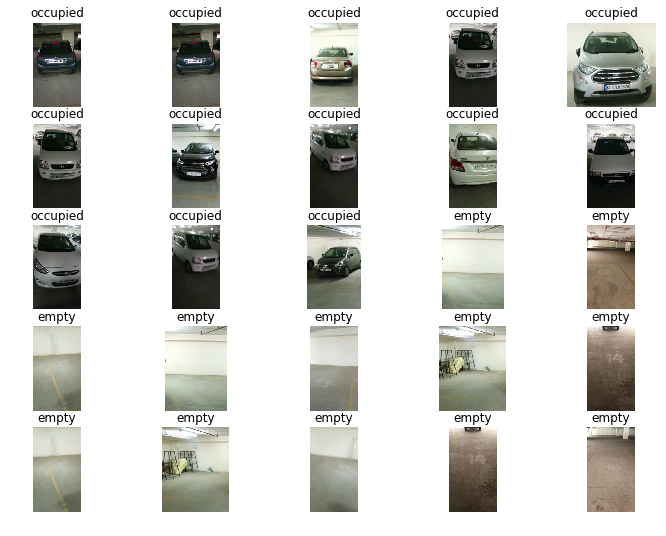

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

cats = np.random.choice(cats_train, 13)
Ants = np.random.choice(dogs_train, 12)
data = np.concatenate((cats, Ants))
labels = 13 * ['occupied'] + 12 *['empty']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
#     print(np.asarray(im))
    plt.axis('off')

In [8]:
print(labels)

['occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'occupied', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty']


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from keras import regularizers
from keras import backend 
from keras.constraints import maxnorm
# from keras.optimizers import SGD

C:\Users\vijay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
backend.image_data_format()#so change the input_size to(@,@,3)
#else channels_first means channels is in the first so input_size(3,@,@)

'channels_last'

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 299,299,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [29]:
# epochs=5
# lrate = 0.01
# sgd = SGD(lr=lrate, momentum=0.9, decay=1e-6, nesterov=False)

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 299, 299, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 74, 74, 128)       73856     
__________

## Data Augmentation

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 8

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    "train_cars",
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    "test_cars",
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 37 images belonging to 1 classes.
Found 6 images belonging to 2 classes.


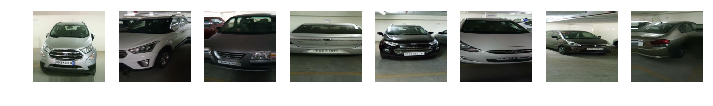

In [8]:
x_batch, y_batch = next(train_generator)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) /2)
    plt.axis('off')

In [32]:
hist=model.fit_generator(train_generator,epochs=2,validation_data=test_generator)

Epoch 1/2


ResourceExhaustedError: OOM when allocating tensor with shape[700928,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_2/RMSprop/mul_20 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](RMSprop_2/lr/read, training_2/RMSprop/gradients/dense_4/MatMul_grad/MatMul_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [10]:
model_name="car_detection.model"
model.save(model_name)

In [13]:
model.evaluate_generator(test_generator)

[0.05344392731785774, 1.0]

## Model learning accuracy

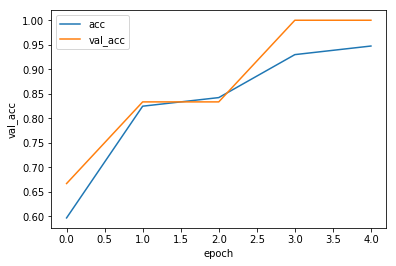

In [14]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.legend(["acc","val_acc"])
plt.show()

## Prediction

In [12]:
from keras.models import load_model
model = load_model(model_name)

In [46]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import time


cred = credentials.Certificate('serviceAccountKey.json')
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://parker-4a4a4.firebaseio.com'})
ref = db.reference('/Area')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import cv2
from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds

def classifier(img_val):
    global preds
#     slot=cv2.imread(img_val)
#     slot=cv2.resize(slot,(400,400))
    img = image.load_img(img_val, target_size=(HEIGHT, WIDTH))
#     cv2.imshow("slot",slot)
    preds = predict(model, img)
    print(preds[0])

classifier("C:\\Users\\vijay\\Deep learning\\valid_cars\\empty\\t(11).jpg")#available 4,9,11

classifier("C:\\Users\\vijay\\Deep learning\\valid_cars\\occupied\\v (3).jpg")#occupied

if preds[0]>0.8:
    print("yes")
    #ref.update({'firstlane': 'occupied'})
else:
#     print("no")
#     ref.update({'firstlane': 'available'})




[0.15973933]
[0.06451121]
no


In [ ]:
#Plotting Function
# def plot_preds(img, preds):
#     """Displays image and the top-n predicted probabilities in a bar graph
#     Args:
#         preds: list of predicted labels and their probabilities
#     """
#     labels = ("cat", "dog")
#     gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
#     plt.figure(figsize=(8,8))
#     plt.subplot(gs[0])
#     plt.imshow(np.asarray(img))
#     plt.subplot(gs[1])
#     plt.barh([0, 1], preds, alpha=0.5)
#     plt.yticks([0, 1], labels)
#     plt.xlabel('Probability')
#     plt.xlim(0, 1)
#     plt.tight_layout()

In [52]:
cv2.destroyAllWindows()

In [22]:
# plot_preds(np.asarray(img), preds)

#     print(preds)
#     vj=preds[0]
#     sus=preds[1]
#     flag=0
#     if vj >sus:
#         flag=2
#         marker(flag)
#         print (flag)

#     else:
#         flag=1
#         marker(flag)
#         print (flag)
        